# `Notebook Contents`
- Importing The Dependencies
- Building VGGFace Network
- Test The Network

### Importing The Dependencies

In [31]:
# Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import Model

# Numpy
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt

### Building VGGFace Network

In [13]:
# The architecture

# The sequentail model
model = Sequential()

# Block 1
model.add(ZeroPadding2D(padding = (1,1),input_shape = (224,224,3)))
model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(ZeroPadding2D(padding = (1,1)))
model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2),strides = (2,2)))

# Block 2
model.add(ZeroPadding2D(padding = (1,1)))
model.add(Convolution2D(128,(3,3),activation = 'relu'))
model.add(ZeroPadding2D(padding = (1,1)))
model.add(Convolution2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2),strides = (2,2)))

# Block 3
model.add(ZeroPadding2D(padding = (1,1)))
model.add(Convolution2D(256,(3,3),activation = 'relu'))
model.add(ZeroPadding2D(padding = (1,1)))
model.add(Convolution2D(256,(3,3),activation = 'relu'))
model.add(ZeroPadding2D(padding = (1,1)))
model.add(Convolution2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2),strides = (2,2)))

# Block 4
model.add(ZeroPadding2D(padding = (1,1)))
model.add(Convolution2D(512,(3,3),activation = 'relu'))
model.add(ZeroPadding2D(padding = (1,1)))
model.add(Convolution2D(512,(3,3),activation = 'relu'))
model.add(ZeroPadding2D(padding = (1,1)))
model.add(Convolution2D(512,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2),strides = (2,2)))

# Block 5
model.add(ZeroPadding2D(padding = (1,1)))
model.add(Convolution2D(512,(3,3),activation = 'relu'))
model.add(ZeroPadding2D(padding = (1,1)))
model.add(Convolution2D(512,(3,3),activation = 'relu'))
model.add(ZeroPadding2D(padding = (1,1)))
model.add(Convolution2D(512,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2),strides = (2,2)))

# Block 6 
model.add(Convolution2D(4096,(7,7),activation = 'relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096,(1,1),activation = 'relu'))
model.add(Dropout(0.5))
# The embeding vector
model.add(Convolution2D(2622,(1,1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [14]:
# Downloading the weights
!gdown --id 14eHppxprE1sCWmnjQ7LuijhAZQlb_Quz

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14eHppxprE1sCWmnjQ7LuijhAZQlb_Quz
To: /content/vgg_face_weights.h5
100% 580M/580M [00:11<00:00, 50.9MB/s]


In [15]:
# Get the weights 
model.load_weights('vgg_face_weights.h5')

In [16]:
# The model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 226, 226, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 226, 226, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                        

In [19]:
# Preprocess the images
def preprocess(img_path):
  img = load_img(img_path,target_size = (224,224))
  img = img_to_array(img)
  img = np.expand_dims(img,axis = 0)
  img = preprocess_input(img)
  return img

# Cosine similarity
def cosine_similarity(source_rep,test_rep):
  a = np.matmul(np.transpose(source_rep),test_rep)
  b = np.sum(np.multiply(source_rep,source_rep))
  c = np.sum(np.multiply(test_rep,test_rep))
  return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

In [28]:
# The model
vgg_face = Model(inputs = model.layers[0].input,outputs = model.layers[-2].output)

### Test The Network

In [65]:
def is_similar(img1,img2,eposilon = 0.40):
  # Get the embeding vector
  img1_emb = vgg_face.predict(preprocess(f'Images/{img1}'),verbose = 0)[0,:]
  img2_emb = vgg_face.predict(preprocess(f'Images/{img2}'),verbose = 0)[0,:]

  # Get similarity
  similarity_res = cosine_similarity(img1_emb,img2_emb)

  # Show img 1
  fig = plt.figure()
  fig.add_subplot(1,2,1)
  plt.imshow(load_img(f'Images/{img1}'))
  plt.axis('off')
  plt.xticks([])
  plt.yticks([])

  # Show img 2
  fig.add_subplot(1,2,2)
  plt.imshow(load_img(f'Images/{img2}'))
  plt.axis('off')
  plt.xticks([])
  plt.yticks([])
  
  # Show the images
  plt.show()

  # Similarity threshold
  print(f'Similarity Score = {similarity_res}')
  if (similarity_res < eposilon):
    print('The images are similar')
  else:
    print('The images aren\'t similar')

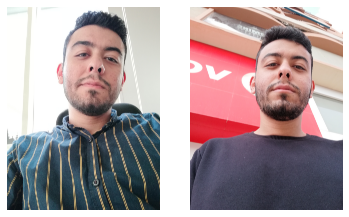

Similarity Score = 0.33137047290802
The images are similar


In [63]:
is_similar('moh1.jpg','moh2.jpg')

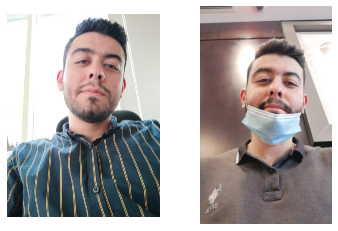

Similarity Score = 0.32001131772994995
The images are similar


In [70]:
is_similar('moh1.jpg','moh3.jpg')

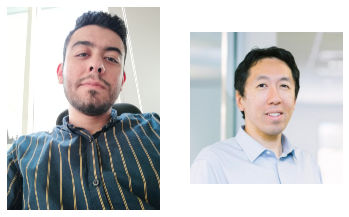

Similarity Score = 0.42168527841567993
The images aren't similar


In [72]:
is_similar('moh1.jpg','Andrew.jpg')

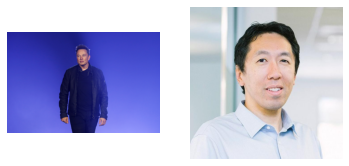

Similarity Score = 0.41622310876846313
The images aren't similar


In [77]:
is_similar('Elon.jpg','Andrew.jpg')